# Netflix Movies and TV Shows

Summary:

In [2]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.gridspec as gridspec # Alignments 

In [4]:
df = pd.read_csv('netflix_titles.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [6]:
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."


In [7]:
df['title'].nunique()

6172

In [8]:
df['title'].value_counts().head(10)

Love               3
The Silence        3
Limitless          3
Oh My Ghost        3
Tunnel             3
Skins              2
Hostages           2
Love O2O           2
Rosario Tijeras    2
Lovesick           2
Name: title, dtype: int64

In [9]:
df['type'].value_counts()

Movie      4265
TV Show    1969
Name: type, dtype: int64

In [11]:
df['release_year'].nunique()

72

In [12]:
df['release_year'].value_counts().head(15)

2018    1063
2017     959
2019     843
2016     830
2015     517
2014     288
2013     237
2012     183
2010     149
2011     136
2009     121
2008     107
2007      71
2006      68
2005      63
Name: release_year, dtype: int64

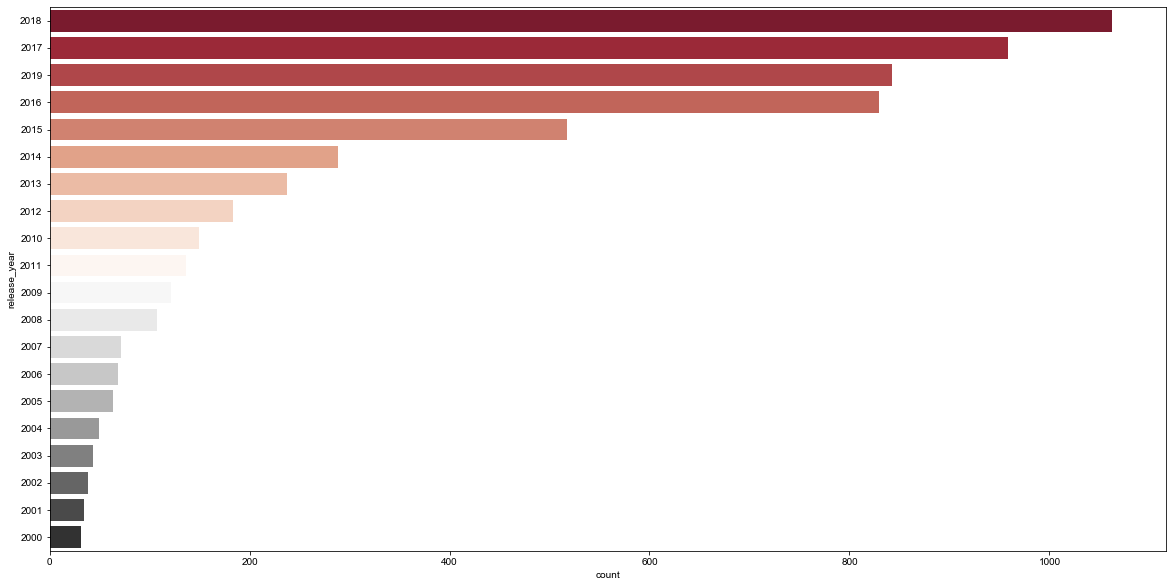

In [13]:
plt.figure(figsize=(20,10))
sns.countplot(y='release_year', data=df, palette="RdGy", order=df['release_year'].value_counts().index[:20])
sns.set_style("darkgrid")
plt.show()

In [36]:
group_netflix=df.type.value_counts()
trace=go.Pie(labels=group_netflix.index,values=group_netflix.values,pull=[0.05,0], marker=dict(colors=["#B22222", "#696969"])) # Actual Data
layout = go.Layout(title="TV Shows VS Movies", height=400, legend=dict(x=0.1, y=1.1)) # layout for data
fig = go.Figure(data=[trace],layout=layout)
iplot(fig)

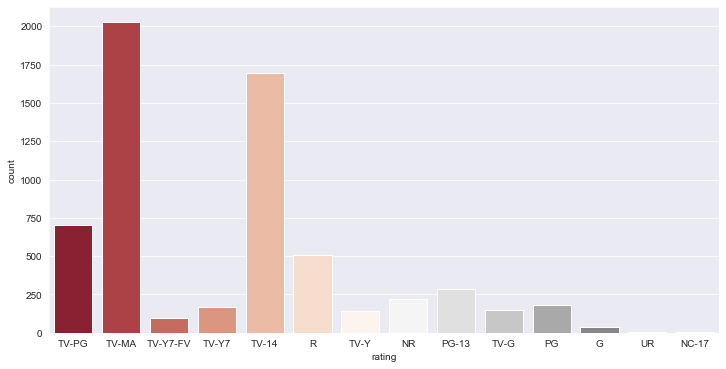

In [20]:
plt.figure(figsize=(12,6))
sns.countplot(x='rating', data=df, palette = 'RdGy')

In [21]:
type(df['date_added'].iloc[0])

str

In [22]:
df['date_added'] = pd.to_datetime(df['date_added'])

In [23]:
df['Month'] = df['date_added'].apply(lambda time: time.month)
df['Day'] = df['date_added'].apply(lambda time: time.dayofweek)
df['Date'] = df['date_added'].apply(lambda time: time.date)

In [24]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [25]:
df['Day'] = df['Day'].map(dmap)

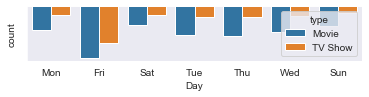

In [80]:

sns.countplot(x='Day', data = df, hue = 'type', palette=colors)


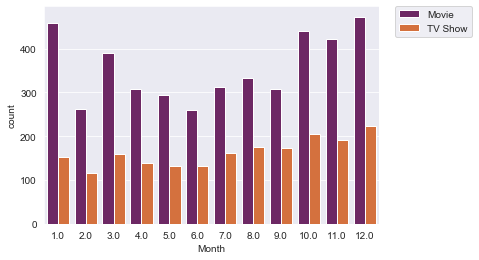

In [73]:
sns.countplot(x='Month', data = df, hue='type', palette='inferno')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


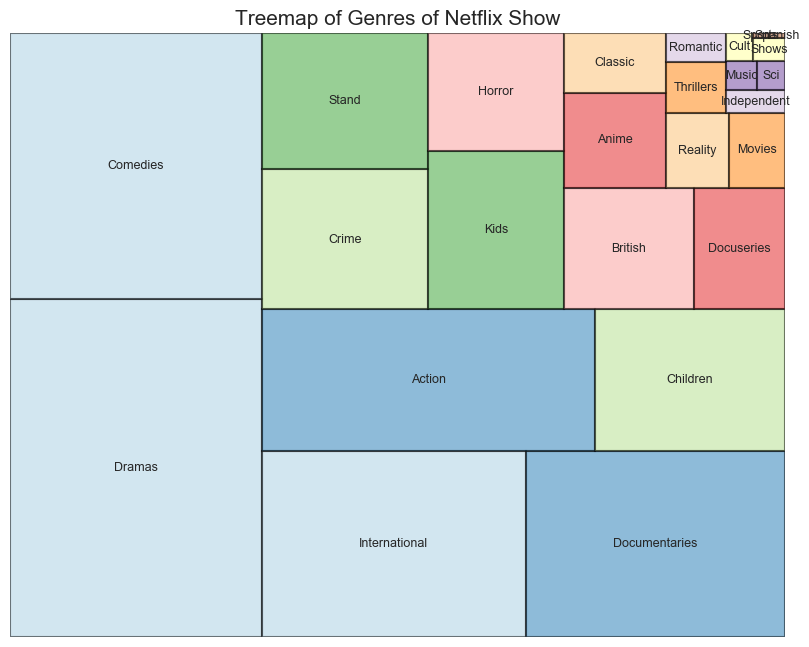

In [72]:

import squarify
df['Genres'] = df['listed_in'].str.extract('([A-Z]\w{2,})', expand=True)
temp_df = df['Genres'].value_counts().reset_index()

sizes=np.array(temp_df['Genres'])
labels=temp_df['index']
colors = [plt.cm.Paired(i/float(len(labels))) for i in range(len(labels))]
plt.figure(figsize=(10,8), dpi= 100)
squarify.plot(sizes=sizes, label=labels, color = colors, alpha=.5, edgecolor="black", linewidth=1.5, text_kwargs={'fontsize':9})
plt.title('Treemap of Genres of Netflix Show', fontsize = 15)
plt.axis('off')
plt.show()